# Homework 4b: Didn't Catch Them All
Physics 177, Spring 2018  
**Due:** Tuesday, May 1

*Van Quiambao*

## Background

This problem is based on Exercise 8.2 in Newman's *Computational Physics*. The **Lotka-Volterra** equations are a model of the population dynamics of predators and prey. See: https://en.wikipedia.org/wiki/Lotka–Volterra_equations

Let $x$ be the population of [Caterpie](http://www.pokemon.com/us/pokedex/caterpie) (prey).  
Let $y$ be the population of [Pidgeotto](http://www.pokemon.com/us/pokedex/pidgeotto) (predator).

In this system, the two main factors that govern the caterpie population is their reproduction rate and the rate at which they are [eaten by pidgeottos](https://bulbapedia.bulbagarden.net/wiki/Pokémon_food). Analogously, the pidgeotto population is governed by the availability of food and the desire to move elsewhere if there is too much competition for food. 

The Lotka-Volterra equations are:  

$\displaystyle \frac{dx}{dt} = a x - b x y$  

$\displaystyle \frac{dy}{dt} = c x y - d y$  
 
The dimensionless parameters $a$, $b$, $c$, and $d$ are positive real numbers that characterize the interaction of the two species.

## 1. Understanding the problem

In a markdown cell below, explain what the meaning of parameters $a$, $b$, $c$, and $d$. Then explain what happens in the limiting case $b= c = 0$.

**Fill in the following** (the first one is a freebie):
* $a$ is the rate at which caterpie reproduce. This is because the rate of change of the caterpie population ($\dot{x}$) has a term $ax$; this term makes the population increase at a rate proportional to the population itself. 
* $b$ is the rate at which the the pidgeottos feast on the caterpies or die. The more predators the higher the value. And having a high number of prey will cause more to be eaten. 
* $c$ is the rate at which the pidgeottos reproduce. This multiplied to the caterpie population as well because available prey affects the amount of predators in the population
* $d$ is the rate at which the pidgeottos die due to natural death or emigration. This factor will exponentially decay in the absence of prey.
* The special case $b = c = 0$ is analyticall solvable. In that case the populations don't affect each other. **FILL THIS IN:** 

*In the case b = c = 0, the population of caterpie will increase normally without the danger of being eaten by pidgeottos. The death rate of the pidgeottos will no longer have an attachment to the amount of pray (caterpie) they can eat. Therefore, the two populations no longer affect each other.*

## 2. Code it up!

Let's build the code to understand this system. We have two first order differential equations:

$$\displaystyle \frac{dx}{dt} = f(x,y,t)$$

$$\displaystyle \frac{dy}{dt} = g(x,y,t)$$

Let these be functions of global variables, `a`, `b`, `c`, and `d`. Fill in the sub-problems below.

### 2.a. Parameters, functions

Fill this in the set up the problem:

In [3]:
# a quick way to fix these parameters in one line
a,b, c, d = .6, 1.3, 1.0, 1.0

def f(x,y,t):
    '''
    This is the rate of change of Caterpie as a function 
    of the current number of Caterpie (x), the current number
    of Pigeotto (y), and the current time (t).
    '''
    
    return a*x - b*x*y # FILL THIS IN

def g(x,y,t):
    '''
    This is the rate of change of Pigeotto as a function 
    of the current number of Caterpie (x), the current number
    of Pigeotto (y), and the current time (t).
    '''
    return c*x*y - d*y# FILL THIS IN

In [4]:
# Test your code: you should get 0.047 and -0.09:
print( f(.1,.1,0) )
print( g(.1,.1,0) )

0.047
-0.09


### 2.b. Time evolution 

At $t=0$, use the **initial conditions** $x_0=y_0=2$. We would like to know what happens to the populations after some amount of. We won't be picky about units, so let's assume that $t$ implicitly has some agreed upon units of time. (Thus $a$, $b$, $c$, and $d$ all have units of rate.)

1. Initialize a Python array with 100 elements. I suggest using `np.arange`. 

2. Use **Euler's method** ("simplest, most obvious ODE algorithm") to fill Python arrays `xlist` and `ylist`. Use $\Delta t = 0.05$.

3. Plot the populations as a function of time using `matplotlib`. 

You've used all of these tools before, feel free to refer back to your earlier homework, the textbook (Chapter 8), and especially the course [Gitter](https://gitter.im/Physics177-2018/).

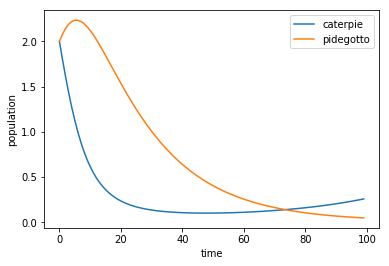

In [17]:
import numpy as np

a, b, c, d = .6, 1.3, 1.0, 1.0

x0 = 2 # FILL IN, init Caterpie population
y0 = 2 # FILL IN, init Pidgeotto population
dt = 0.05 # FILL IN, time step
N  = 100 # FILL IN, # number of steps

## A an array: [0,1,2, ..., N]
time = np.arange(N) # FILL IN


xlist = [] # FILL IN, initialize array
ylist = [] #FILL IN, initialize array

# Initialize x and y
x = 2 # FILL IN
y = 2 # FILL IN

for t in time:
    # FILL THIS IN WITH EULER'S METHOD
    xlist.append(x)
    x += dt*f(x,y,t)
    ylist.append(y)
    y += dt*g(x,y,t)
    

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(time, xlist, label = 'caterpie')
plt.plot(time, ylist, label = 'pidegotto')
plt.xlabel('time')
plt.ylabel('population')
plt.legend()
plt.show()
# FILL IN TO PRODUCE THE PLOT SHOWN IN Problem 2.c below

### 2.c. Discussion

Your plot should reproduce this:

<img src="HW4b_2b.png">

In your own words, tell the story of what is going on with the Caterpie and Pidgeotto populations over the time period shown. What do you expect will happen as these populations continue to dynamically evolve?

*Since the pidgeotto population is feasting on the caterpie population faster than they can reproduce, the caterpie population declines. Since the pidgeottos are struggling to find food because of the high demand of caterpies while their population decreases, then the pidgeotto population suffers the same fate and also begins to decline because of the scarcity of food. Once the caterpies are able to out reproduce the number of pidgeottos eating their population, they will begin to increase again. This causes the pidgeotto population to rise as food is becoming more available and the cycle continues again.*

### 2.d. Evolution into the future

Copy your code from Problem 2.b and paste it into the empty cell below. Re-run the code for $N=500$

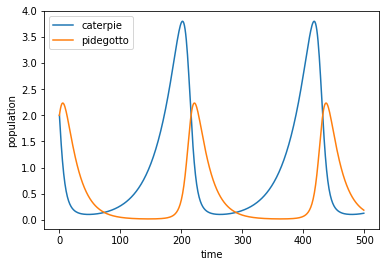

In [18]:
import numpy as np

a, b, c, d = .6, 1.3, 1.0, 1.0

x0 = 2 # FILL IN, init Caterpie population
y0 = 2 # FILL IN, init Pidgeotto population
dt = 0.05 # FILL IN, time step
N  = 500 # FILL IN, # number of steps

## A an array: [0,1,2, ..., N]
time = np.arange(N) # FILL IN


xlist = [] # FILL IN, initialize array
ylist = [] #FILL IN, initialize array

# Initialize x and y
x = 2 # FILL IN
y = 2 # FILL IN

for t in time:
    # FILL THIS IN WITH EULER'S METHOD
    xlist.append(x)
    x += dt*f(x,y,t)
    ylist.append(y)
    y += dt*g(x,y,t)
    

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(time, xlist, label = 'caterpie')
plt.plot(time, ylist, label = 'pidegotto')
plt.xlabel('time')
plt.ylabel('population')
plt.legend()
plt.show()
# FILL IN TO PRODUCE THE PLOT SHOWN IN Problem 2.c below

### 2.e. Other initial conditions

Copy your code from Problem 2.b and paste it into the empty cell below. Re-run the code with a different set of Lotka-Volterra parameters:

```python
a, b, c, d = 4, 2, 3, 3
```

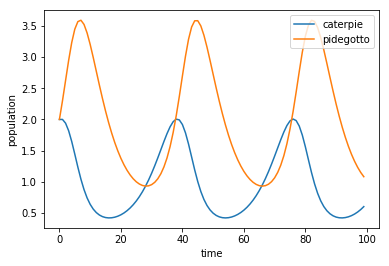

In [19]:
import numpy as np

a, b, c, d = 4, 2, 3, 3

x0 = 2 # FILL IN, init Caterpie population
y0 = 2 # FILL IN, init Pidgeotto population
dt = 0.05 # FILL IN, time step
N  = 100 # FILL IN, # number of steps

## A an array: [0,1,2, ..., N]
time = np.arange(N) # FILL IN


xlist = [] # FILL IN, initialize array
ylist = [] #FILL IN, initialize array

# Initialize x and y
x = 2 # FILL IN
y = 2 # FILL IN

for t in time:
    # FILL THIS IN WITH EULER'S METHOD
    xlist.append(x)
    x += dt*f(x,y,t)
    ylist.append(y)
    y += dt*g(x,y,t)
    

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(time, xlist, label = 'caterpie')
plt.plot(time, ylist, label = 'pidegotto')
plt.xlabel('time')
plt.ylabel('population')
plt.legend()
plt.show()
# FILL IN TO PRODUCE THE PLOT SHOWN IN Problem 2.c below

### 2.f. [Things Fall Apart](https://en.wikipedia.org/wiki/Things_Fall_Apart)

Let's see what happens if we choose our integration poorly. 

Once again, copy your code from Problem 2.b and paste it into the empty cell below. You should be back to the original set of  Lotka-Volterra parameters:

```python
a, b, c, d = .6, 1.3, 1, 1
```

But this time, let's try to be cheap and use a much bigger time step. Try using `dt = 0.5` and `N = 10`. This should look nothing like the behavior  you expect from the nice plots you produced earlier. You did get nice plots earlier, right?  

Say a few words about what went wrong.

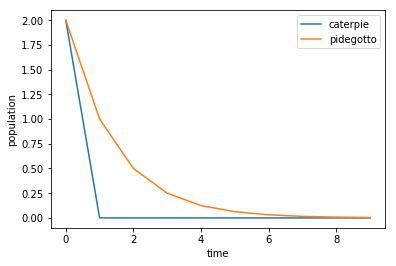

In [20]:
import numpy as np

a, b, c, d = .6, 1.3, 1.0, 1.0

x0 = 2 # FILL IN, init Caterpie population
y0 = 2 # FILL IN, init Pidgeotto population
dt = 0.5 # FILL IN, time step
N  = 10 # FILL IN, # number of steps

## A an array: [0,1,2, ..., N]
time = np.arange(N) # FILL IN


xlist = [] # FILL IN, initialize array
ylist = [] #FILL IN, initialize array

# Initialize x and y
x = 2 # FILL IN
y = 2 # FILL IN

for t in time:
    # FILL THIS IN WITH EULER'S METHOD
    xlist.append(x)
    x += dt*f(x,y,t)
    ylist.append(y)
    y += dt*g(x,y,t)
    

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(time, xlist, label = 'caterpie')
plt.plot(time, ylist, label = 'pidegotto')
plt.xlabel('time')
plt.ylabel('population')
plt.legend()
plt.show()
# FILL IN TO PRODUCE THE PLOT SHOWN IN Problem 2.c below

**Explain what went wrong**: *The caterpie population never had the chance to reproduce faster than they were eaten because the pidgeotto population ate them so fast they became extinct, thus causing the pidgeotto population to also go extinct because of the lack of food (caterpie).*

## 3. Population Dynamics Phase Space

By now you've noticed the periodic behavior of the system. You may have realized that the plots that we're making are useful if we really care about what time of year to visit [Kanto](https://bulbapedia.bulbagarden.net/wiki/Region) in order to see caterpies or pigeottos, but are not actually as useful for understanding how the two populations are inter-related. Let's make those plots. 

### 3.a. The caterpie---pigetotto plane

Copy the code from Problem 2.d (with `N=500`) and modify it so that it plots the caterpie and pidgeotto populations on the horizontal and vertical axes, respectively. 

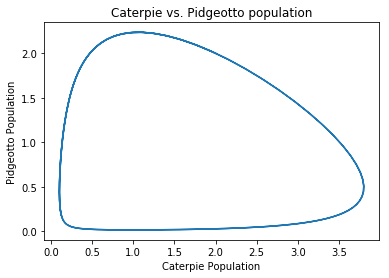

In [26]:
import numpy as np

a, b, c, d = .6, 1.3, 1.0, 1.0

x0 = 2 # FILL IN, init Caterpie population
y0 = 2 # FILL IN, init Pidgeotto population
dt = 0.05 # FILL IN, time step
N  = 500 # FILL IN, # number of steps

## A an array: [0,1,2, ..., N]
time = np.arange(N) # FILL IN


xlist = [] # FILL IN, initialize array
ylist = [] #FILL IN, initialize array

# Initialize x and y
x = 2 # FILL IN
y = 2 # FILL IN

for t in time:
    # FILL THIS IN WITH EULER'S METHOD
    xlist.append(x)
    x += dt*f(x,y,t)
    ylist.append(y)
    y += dt*g(x,y,t)
    

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(xlist, ylist)
plt.xlabel('Caterpie Population')
plt.ylabel('Pidgeotto Population')
plt.title('Caterpie vs. Pidgeotto population')
plt.show()
# FILL IN TO PRODUCE THE PLOT SHOWN IN Problem 2.c below

### 3.b. The velocity in population space

**Quiver plots** are what `matplotlib` calls plots of vector fields. Here's an example of how they work:

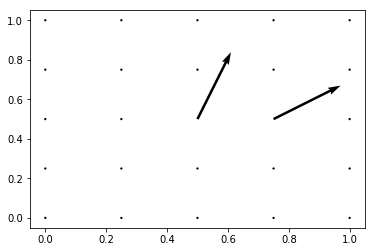

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# base positions of the vectors
x = np.linspace(0,1,5)
y = np.linspace(0,1,5)

# magnitude of the x- and y-components of each vector
u = np.zeros((5,5)) # initialize to zero everywhere
v = np.zeros((5,5)) # initialize to zero everywhere

u[2,2] = .1 # x-component of vector at (2,2)
v[2,2] = .2 # y-component of vector at (2,2)

u[2,3] = .2 # x-component of vector at (2,2)
v[2,3] = .1 # y-component of vector at (2,2)



plt.quiver(x, y, u, v, scale=1)
plt.show()

Make a vector field that show the vector 

$$ \mathbf{v}(x,y) = \left (\dot x, \dot y \right)$$

at each position on the caterpie-pigeotto plane. You'll have to vectorize the functions $f$ and $g$. I'll get you started.

Overlay the vector field plot on the plot from Problem 3.a.

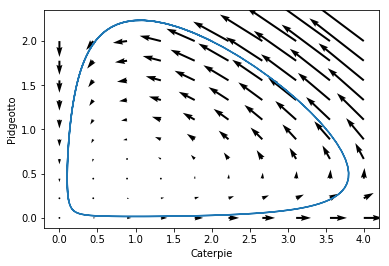

In [32]:
ff = np.vectorize(f)
gg = np.vectorize(g)

side = np.linspace(0,4,10)
XX,YY = np.meshgrid(side,side/2)
UU = ff(XX,YY,0)
VV = gg(XX,YY,0)

plt.quiver(
    XX, YY, UU, VV# FILL THIS IN
)
plt.plot(
    xlist, ylist# FILL THIS IN (Problem 3a plot)
)
plt.xlabel('Caterpie')
plt.ylabel('Pidgeotto')
plt.show()

This image now shows the cyclicity of the caterpie and pigeotto populations as well as how long the populations spend in any particular part of the cycle.

### 3.c. Describe the dynamics

In the markdown cell below, write a few sentences describing the cycle of caterpie and pigeotto populations. You may want to describe this in terms of three "phases" corresponding to the three notable features of the plot in Problem 3.b.

**Background on variables:** The rate at which the Pidgeotto population can eat caterpies faster than the rate that the caterpies can reproduce. Both populations reproduce at the same rate.

**Phase 1:**
* The population of Pidgeotto is increasing because there a lot of caterpies to be eaten.
* The population of Caterpie is decreasing because they are being eaten at a higher rate than they can reproduce.

**Phase 2:**
* The population of caterpie is at an all time low.
* The population of Pidgeotto goes down dramatically because of the scarcity of food.

**Phase 3:**
* The population of Pidgeotto is at an all time low.
* the populattion of Caterpie thrives because of the low threat level due to the lower amount of Pidgeottos.

The Phases go in a cycle.


## X. Extra Credit

Modify $f(x,y,t)$ and $g(x,y,t)$ to include external effects. For example, consider putting in a time-dependent factor (something like $\sin(t)$) that is supposed to model the seasons. Maybe certain times of the year it is difficult for pidgotto to hunt caterpie, for example. Redo the main plots in problem 2 adn 3.

## Y. Extra Credit

Redo Problem 2.c using the second-order **Runge-Kutta** algorithm (see example 8.2 in the textbook). How much smaller can you make $N$ to still get a plot that is reasonably close to the one you found in Problem 2.c with Euler's method and $\Delta t = 0.05$, $N = 100$. Remember that $N\Delta t$ is constant, so you have to also increase $\Delta t$ to make sure you're integrating the ODE over the same range.